In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from nn.nn import NeuralNetwork

In [2]:
random_seed = 37

In [3]:
digits = load_digits()
X = digits.data
y = digits.target

X = X / 16.0 # Normalize the data to range [0, 1]

X_train, X_val, y_train, y_val = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=random_seed
   )

print(X_val.shape)

(360, 64)


In [ ]:
nn_architecture = [
    {'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},
    {'input_dim': 16, 'output_dim': 64, 'activation': 'none'},
]

# Hyperparameters
learning_rate = 0.0001 # looked like an L at lr=0.01, and was way too slow at lr=0.001
seed = random_seed # 37 is a cool number
batch_size = 16 # data easily fits in memory
epochs = 5000 # it's a pretty bad model... likely won't overfit even if i train for 9k years tbh
loss_function = 'mean_squared_error' # classic

autoencoder = NeuralNetwork(
    nn_arch=nn_architecture,
    lr=learning_rate,
    seed=seed,
    batch_size=batch_size,
    epochs=epochs,
    loss_function=loss_function
)

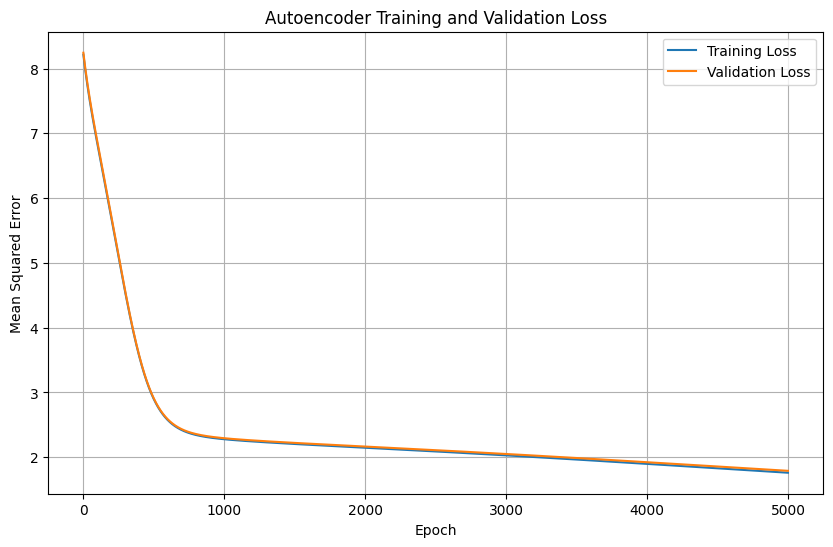

In [5]:
# Train the autoencoder
train_losses, val_losses = autoencoder.fit(X_train, X_train, X_val, X_val)

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Autoencoder Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Evaluate the autoencoder on validation data
reconstructed_val, _ = autoencoder.forward(X_val)
reconstructed_val = reconstructed_val.T  # Convert to original shape

mse = np.mean((X_val - reconstructed_val) ** 2)
print(f"Average reconstruction error (MSE) on validation set: {mse:.6f}")

Average reconstruction error (MSE) on validation set: 0.055931


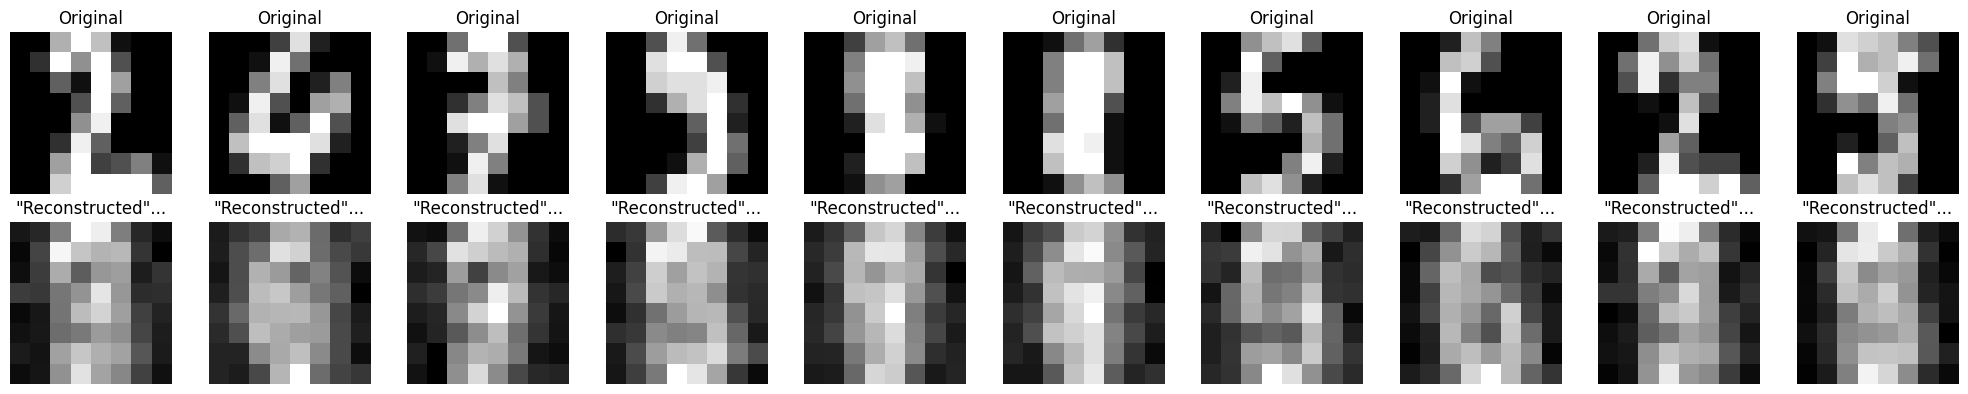

In [9]:
# Visualize original images and their reconstructions
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_val[i].reshape(8, 8), cmap='gray') #plot originals
    plt.title("Original")
    plt.axis('off')
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_val[i].reshape(8, 8), cmap='gray') #plot "reconstructions"... oof
    plt.title('"Reconstructed"')
    plt.axis('off')

plt.tight_layout()
plt.show()

### Hyperparameter Choices:

1. Architecture (64x16x64):
   - required by assignment

2. Learning Rate (0.0001):
   - looked like an L at lr=0.01, and was way too slow at lr=0.001
   - I had the computational power to train for a while, so I went with a smaller learning rate bc larger ones were just not improving the loss
   - still a little high based on the l-shaped loss curve

3. Batch Size (16):
   - Provides good balance between computation efficiency and gradient accuracy
   - Started with 32, but found the batch size needed to be small enough to update parameters frequently

4. Epochs (5000):
   - found that a low LR and high epochs minimized validation loss on this dataset
   - modern computers can handle this well

5. Loss Function (MSE):
   - Mean squared error is the standard for reconstruction tasks
